Brian Rodney
DSC-580-O500
<br> Marketing Campaign Assessment Capstone

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go

import dash
import dash_table
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


sns.set_palette('icefire')
sns.set_style('darkgrid')
sns.set_context('paper')

c:\Users\BR\miniconda3\envs\myenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Loading & Preprocessing Data**

In [2]:
# Load dataset
data = pd.read_csv('C:/Users/BR/Desktop/mktcmpdata.csv')

print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 2556 non-null   int64 
 1   YOB                     2556 non-null   int64 
 2   Education               2556 non-null   object
 3   Marital_Status          2556 non-null   object
 4   Income                  2526 non-null   object
 5   Kidhome                 2556 non-null   int64 
 6   Teenhome                2556 non-null   int64 
 7   Country                 2556 non-null   object
 8   Orig_Customer           2556 non-null   object
 9   Last Activity           2556 non-null   int64 
 10  AmtMeatProducts         2556 non-null   int64 
 11  AmtVegetables           2556 non-null   int64 
 12  AmtAlcoholPurchases     2556 non-null   int64 
 13  AmtClothingPurchases    2556 non-null   int64 
 14  AmtCosmeticPurchases    2556 non-null   int64 
 15  AmtE

,Cust_ID,YOB,Education,Marital_Status,Income,Kidhome,Teenhome,Country,Orig_Customer,Last Activity,...,PhonePurchase,BMPurchase,OnlineActivity,Camp3,Camp4,Camp5,Camp1,Camp2,RecentCamp,Complaints
0,5524,1957,Associate,Single,"$58,138.00",0,0,US,7/13/2020,58,...,10,4,7,0,0,0,0,0,1,0
1,1362,1972,Associate,Single,"$31,907.00",0,0,GER,6/29/2019,75,...,1,6,7,0,0,0,0,0,0,0
2,8029,1988,Master,Single,"$90,247.00",0,0,US,7/7/2017,27,...,4,7,1,0,1,1,1,0,1,0
3,3523,1962,Associate,Together,"$75,072.00",0,1,SP,9/29/2016,83,...,4,8,3,0,0,0,0,0,0,0
4,3478,1971,PhD,Married,"$60,585.00",1,1,CA,4/18/2017,17,...,4,9,5,0,0,0,0,0,1,0


In [3]:
# Clean any whitespace from column names
data.columns = data.columns.str.replace(' ', '')
data.head()

,Cust_ID,YOB,Education,Marital_Status,Income,Kidhome,Teenhome,Country,Orig_Customer,LastActivity,...,PhonePurchase,BMPurchase,OnlineActivity,Camp3,Camp4,Camp5,Camp1,Camp2,RecentCamp,Complaints
0,5524,1957,Associate,Single,"$58,138.00",0,0,US,7/13/2020,58,...,10,4,7,0,0,0,0,0,1,0
1,1362,1972,Associate,Single,"$31,907.00",0,0,GER,6/29/2019,75,...,1,6,7,0,0,0,0,0,0,0
2,8029,1988,Master,Single,"$90,247.00",0,0,US,7/7/2017,27,...,4,7,1,0,1,1,1,0,1,0
3,3523,1962,Associate,Together,"$75,072.00",0,1,SP,9/29/2016,83,...,4,8,3,0,0,0,0,0,0,0
4,3478,1971,PhD,Married,"$60,585.00",1,1,CA,4/18/2017,17,...,4,9,5,0,0,0,0,0,1,0


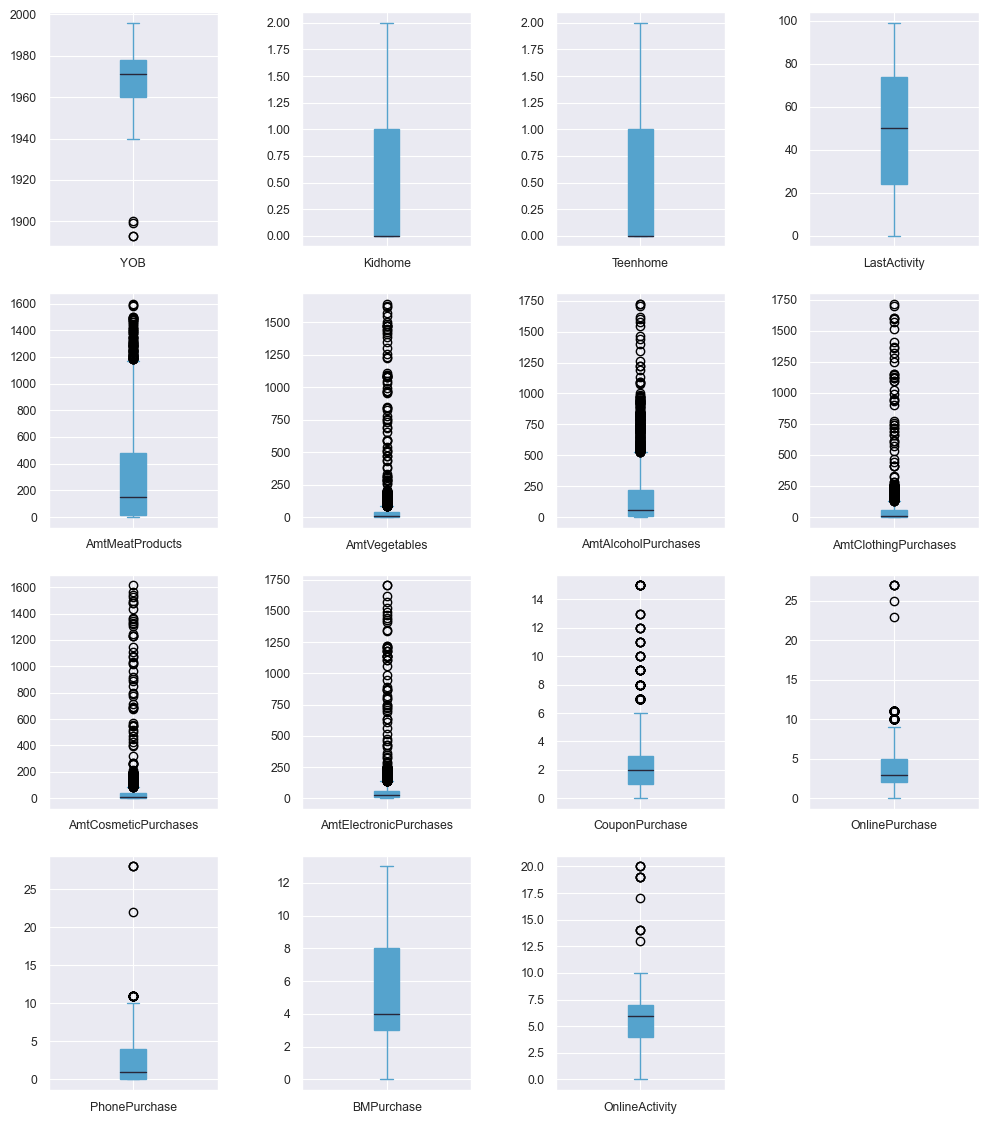

In [4]:
# Plot columns to check for outliers
dataplot = data.drop(columns=['Cust_ID', 'Camp1', 'Camp2', 
                              'Camp3', 'Camp4', 'Camp5', 
                              'RecentCamp', 'Complaints']).select_dtypes(include=np.number)
dataplot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), 
                patch_artist=True)
plt.subplots_adjust(wspace=0.5)

<AxesSubplot:>

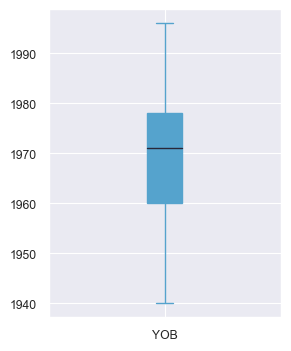

In [5]:
# Removing erronous entries from Year of Birth [YOB] (<= 1900)
data = data[data['YOB'] > 1900].reset_index(drop=True)

plt.figure(figsize=(3,4))
data['YOB'].plot(kind='box', patch_artist=True)

In [6]:
# Checking for null values
data.isna().sum()

Cust_ID                    0
YOB                        0
Education                  0
Marital_Status             0
Income                    30
Kidhome                    0
Teenhome                   0
Country                    0
Orig_Customer              0
LastActivity               0
AmtMeatProducts            0
AmtVegetables              0
AmtAlcoholPurchases        0
AmtClothingPurchases       0
AmtCosmeticPurchases       0
AmtElectronicPurchases     0
CouponPurchase             0
OnlinePurchase             0
PhonePurchase              0
BMPurchase                 0
OnlineActivity             0
Camp3                      0
Camp4                      0
Camp5                      0
Camp1                      0
Camp2                      0
RecentCamp                 0
Complaints                 0
dtype: int64

Income shows 30 null values. Prior to plotting to determine the imputation strategy, we will need to convert from object to float-type and remove the special character.

In [7]:
# Cleaning the Income feature

data['Income'] = data['Income'].str.replace('$', '')
data['Income'] = data['Income'].str.replace(',', '').astype('float')

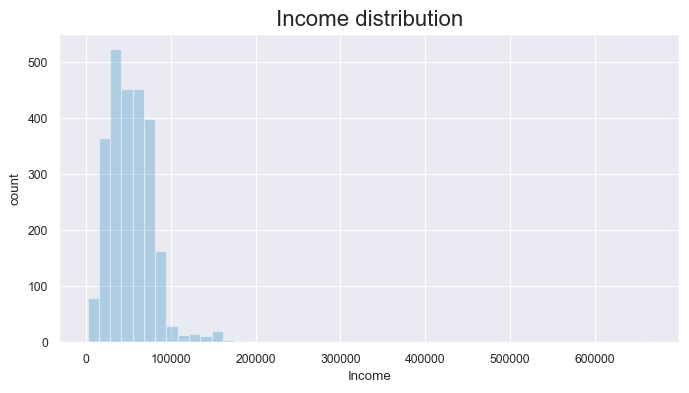

In [8]:
plt.figure(figsize=(8,4))
sns.distplot(data['Income'], kde=False, hist=True)
plt.title('Income distribution', size=16)
plt.ylabel('count');

A couple of outliers were noted but nothing major. We will impute the null values with the median to reduce the effects of the outliers.

In [9]:
data['Income'] = data['Income'].fillna(data['Income'].median())

**Transformation of Features**

- The total number of dependents in the home ('Children') can be engineered from the sum of 'Kidhome' and 'Teenhome'
- The year of becoming a customer ('Account_Year') can be engineered from 'Orig_Customer'
- The total amount spent ('Total_Spent') can be engineered from the sum of all features containing the keyword 'Amt'
- The total purchases ('Total_Purchases') can be engineered from the sum of all features containing the keyword 'Purchase'
- The total number of campains accepted ('Total_Campaign') can be engineered from the sum of all features containing the keywords 'Camp'.

In [10]:
# Variable consolidation

ts_col = [col for col in data.columns if "Amt" in col]
pur_col = [col for col in data.columns if "Purchase" in col]
cmp_col = [col for col in data.columns if "Camp" in col]

data['Children'] = data['Kidhome'] + data['Teenhome']
data['Account_Year'] = pd.DatetimeIndex(data['Orig_Customer']).year
data['Total_Spent'] = data[ts_col].sum(axis=1)
data['Total_Purchases'] = data[pur_col].sum(axis=1)
data['Total_Campaign'] = data[cmp_col].sum(axis=1)

data[['Cust_ID', 'Children', 'Account_Year', 'Total_Spent', 'Total_Purchases', 'Total_Campaign']].head()

,Cust_ID,Children,Account_Year,Total_Spent,Total_Purchases,Total_Campaign
0,5524,0,2020,1617,919,1
1,1362,0,2019,449,343,0
2,8029,0,2017,1621,420,4
3,3523,1,2016,1073,475,0
4,3478,2,2017,736,457,1


**Correlation/Patterns of Interest**

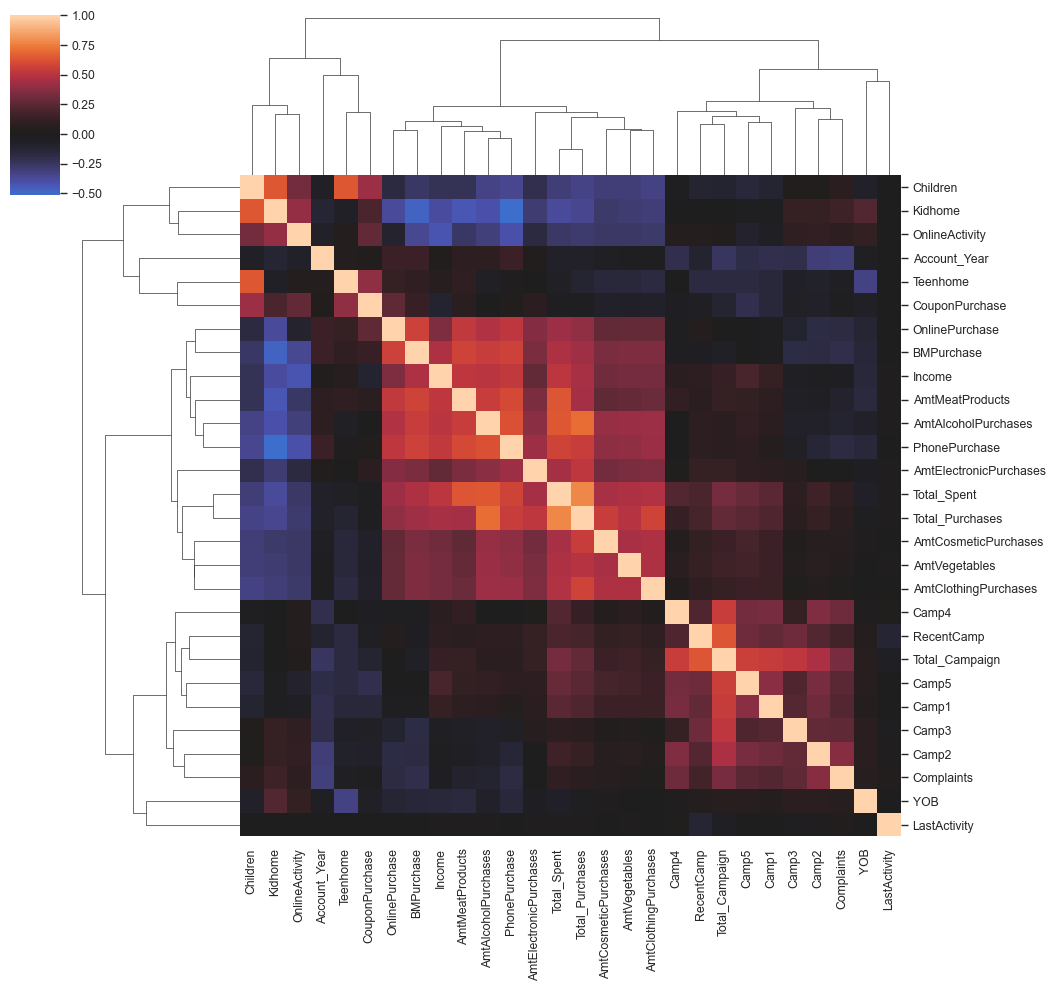

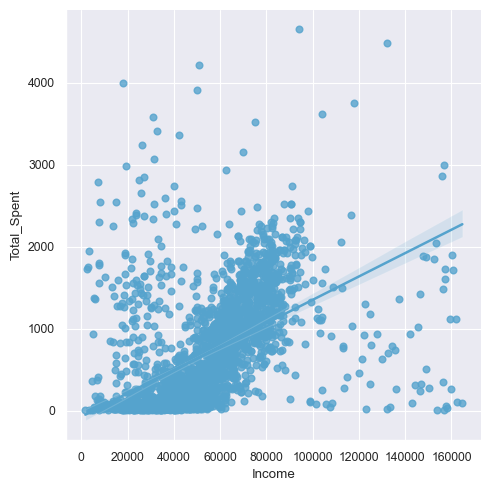

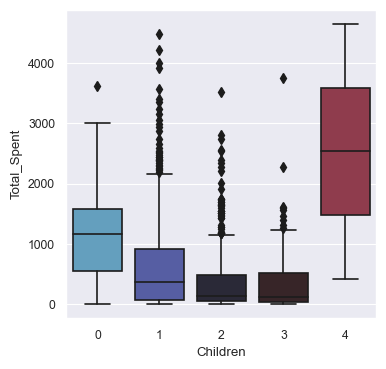

<Figure size 400x400 with 0 Axes>

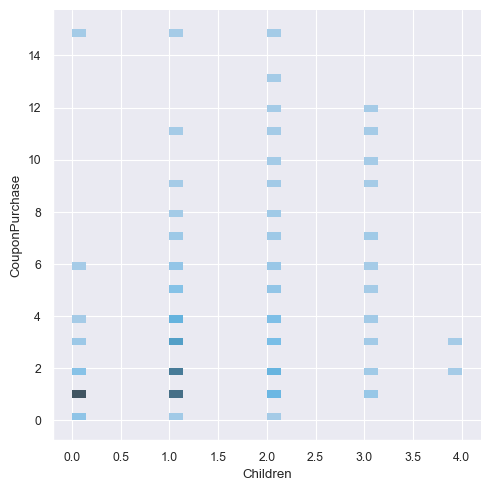

In [11]:
# Checking for correlation

corr = data.drop(columns='Cust_ID').select_dtypes(include=np.number).corr(method = 'kendall')

sns.clustermap(corr, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='icefire', center=0)

sns.lmplot(x='Income', y='Total_Spent', data=data[data['Income'] < 300000]);

plt.figure(figsize=(4,4))
sns.boxplot(x='Children', y='Total_Spent', data=data);

plt.figure(figsize=(4,4))
sns.displot(x='Children', y='CouponPurchase', data=data);

The above scatterplot shows the effects of income on total spending. The income was limited to < 300000 to remove outliers.

**Data Visualizations**

Highlighting the success rate of each marketing campaign. Based on the results, the most recent campaign (RecentCamp) was the most successful.

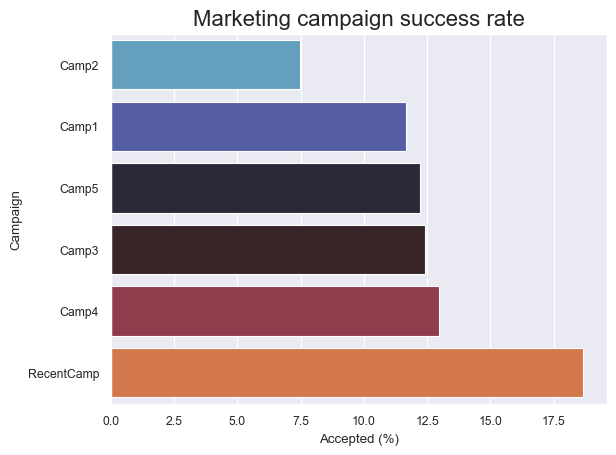

In [12]:
# Calculate success rate (percent accepted)
cam_success = pd.DataFrame(data[['Camp1', 'Camp2', 'Camp3', 'Camp4', 'Camp5', 'RecentCamp']].mean()*100, 
                           columns=['Percent']).reset_index()

# Plot
sns.barplot(x='Percent', y='index', data=cam_success.sort_values('Percent'))
plt.xlabel('Accepted (%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size=16);

Determining which products performed the best. Nearly $300 was spent on meat products (AmtMeatProducts) with alcohol products (AmtAlcoholPurchases) at ~$165.

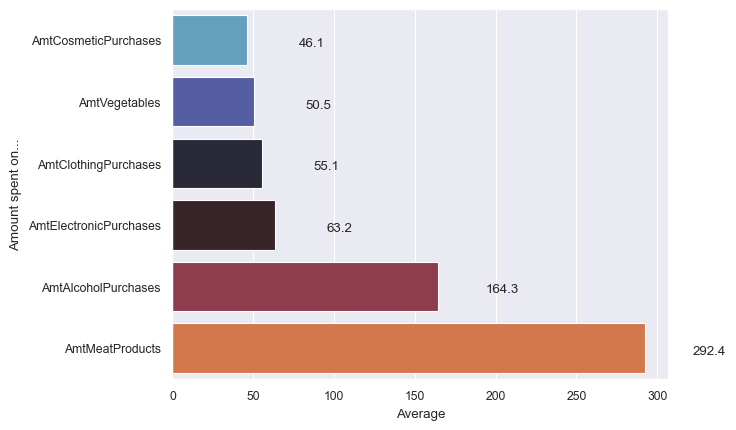

In [13]:
spending = pd.DataFrame(round(data[ts_col].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# Plot
ax = sns.barplot(x='Average', y='index', data=spending)
plt.ylabel('Amount spent on...')

# Add text labels for each bar value
for p,q in zip(ax.patches, spending['Average']):
    ax.text(x=q+40,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

Highlighting the average customer profile. Based on the demographics of the customer base, the average customer is:

- Born in 1969
- Opened their account in 2017
- Has an annual income of ~$52K
- Has at least 1 child at home

In [14]:
# Average customer demographics
demographics = pd.DataFrame(round(data.drop(columns=ts_col+pur_col+cmp_col).mean(), 1), columns=['Average']).reindex([
    'YOB', 'Account_Year', 'Income', 'Children', 'Kidhome', 'Teenhome'])

demographics

,Average
YOB,1969.5
Account_Year,2017.2
Income,52713.1
Children,1.0
Kidhome,0.5
Teenhome,0.5


**Statistical Analysis**

Determining if there is any significant relationship between geographic location and the marketing campaign success.

- Findings:
    - The campaign acceptance rates are low overall
    - The campaign with the highest overall acceptance rate is the most recent campaign (column name: `RecentCamp`)
    - The country with the highest acceptance rate in any campaign is Mexico

In [15]:
cam_success = pd.DataFrame(data[['Camp1', 'Camp2', 'Camp3', 'Camp4', 'Camp5', 'RecentCamp']].mean()*100, 
                           columns=['Percent']).reset_index()

In [16]:
data['Country_code'] = data['Country'].replace({'SP': 'ESP', 'CA': 'CAN', 'US': 'USA', 'SA': 'ZAF', 'ME': 'MEX'})

# success of campaigns by country code
df_cam = data[['Country_code', 'Camp1', 'Camp2', 'Camp3', 'Camp4', 'Camp5', 'RecentCamp']].melt(
    id_vars='Country_code', var_name='Campaign', value_name='Accepted (%)')
df_cam = pd.DataFrame(df_cam.groupby(['Country_code', 'Campaign'])['Accepted (%)'].mean()*100).reset_index(drop=False)

# rename the campaign variables so they're easier to interpret
df_cam['Campaign'] = df_cam['Campaign'].replace({'Camp1': '1',
                                                'Camp2': '2',
                                                'Camp3': '3',
                                                'Camp4': '4',
                                                'Camp5': '5',
                                                 'RecentCamp': 'Most recent'
                                                })

# choropleth plot

fig1 = px.choropleth(df_cam, locationmode='ISO-3', color='Accepted (%)', facet_col='Campaign', facet_col_wrap=2,
                    facet_row_spacing=0.05, facet_col_spacing=0.01, width=700,
                    locations='Country_code', projection='natural earth', title='Marketing Campaign Success Rate by Country'
                   )
fig1.show()

In [17]:
# Performing logistic regression p-values for campaign acceptance ~ country using GLM
import statsmodels.formula.api as smf
import statsmodels as sm
from scipy import stats

data_cam_ww = data[['Country', 'Camp1', 'Camp2', 'Camp3', 'Camp4', 'Camp5', 'RecentCamp']]

stat_results = []

# GLM
for col in data_cam_ww.drop(columns='Country').columns:
    this_data = data_cam_ww[['Country', col]]
    
    formula = col+'~Country'
    
    # logistic regression (family=binomial)
    model = smf.glm(formula = formula, data=this_data, family=sm.genmod.families.Binomial())
    result = model.fit()
    
    chisq = result.pearson_chi2
    pval = stats.distributions.chi2.sf(chisq , 7) 
     
    stat_results.append(pval)
    
    print(result.summary())
    
# Checking results
print("\nChisq p-values: ", stat_results)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Camp1   No. Observations:                 2552
Model:                            GLM   Df Residuals:                     2544
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -918.75
Date:                Wed, 12 Oct 2022   Deviance:                       1837.5
Time:                        21:21:33   Pearson chi2:                 2.55e+03
No. Iterations:                     5   Pseudo R-squ. (CS):          0.0008573
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.3085      0.254     -9.

In [18]:
# Merging original country codes into dataset
countries = data[['Country', 'Country_code']].drop_duplicates().reset_index(drop=True)
df_cam2 = df_cam.merge(countries, how='left', on='Country_code')
df_cam2.head()

# Graphing results
fig3 = px.bar(df_cam2, x='Country', y='Accepted (%)', facet_col='Campaign', color = 'Campaign',
title='Regional Effects on Campaign Effectiveness')
fig3

Performed logistic regression for Campaign Accepted by Country, reporting Chisq p-value for overall model.
- Findings: The regional differences in marketing campaign success are statistically significant.

**Dash (Data Product Prep)**

In [19]:
chart1 = px.pie(cam_success, values='Percent', names='index',
               title='Success Rates of Marketing Campaigns',
                height = 500)
chart1.update(layout=dict(title=dict(x=0.5)))

In [20]:
chart2 = px.pie(data, values='Total_Campaign', names='Country',
               title='Overall Positive Campaign Response by Country',
                height = 500)
chart2.update(layout=dict(title=dict(x=0.5)))

In [21]:
fig2 = px.scatter(
    data, #dataframe
    x="Total_Spent", #x
    y="Total_Purchases", #y
    size="Total_Spent", #bubble size
    color="Country",#bubble color
    color_continuous_scale=px.colors.sequential.Plotly3, #color theme
    title="Purchases and Spending by Country", #chart title
)
fig2.update_layout(
    xaxis_tickangle=30,#angle of the tick on x-axis
    title=dict(x=0.5), #set the title in center
    xaxis_tickfont=dict(size=9), #set the font for x-axis
    yaxis_tickfont=dict(size=9), #set the font for y-axis
    margin=dict(r=20, t=50, b=20), #set the margin
    paper_bgcolor="LightSteelblue", #set the background color for chart
)

**Dash product**

In [22]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

fig1 = dcc.Graph(
        id='fig1',
        figure=fig1,
        className="four columns"
    )
chart1 = dcc.Graph(
        id='chart1',
        figure=chart1,
        className="four columns"
    )
chart2 = dcc.Graph(
        id='chart2',
        figure=chart2,
        className="four columns"
    )
fig3 = dcc.Graph(
        id='fig3',
        figure=fig3,
        className="twelve columns"
    )

table = dash_table.DataTable(
    id="table",
    columns=[{"name": i, "id": i} for i in data.columns],
    data=data.to_dict("records"),
    page_size=20,  
    style_table={'height': '300px', 'overflowY': 'auto'},
    export_format='xlsx',
    export_headers='display',
    merge_duplicate_headers=True
)
# setup the header
header = html.H2(children="Marketing Campaign Results")

# setup to rows, graph 1-3 in the first row, and graph 4 in the second:
row1 = html.Div(children=[chart1, chart2])
row2 = html.Div(children=[fig1, fig3])

# setup & apply the layout
layout = html.Div(children=[header, row1, row2, table], style={"text-align": "center"})
app.layout = layout

In [23]:
if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Oct/2022 21:22:45] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Oct/2022 21:22:46] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [12/Oct/2022 21:22:46] "GET /_dash-layout HTTP/1.1" 200 -
